<center><h1>Data Science Small Test - HIAE</h1></center>

This is a small test to check the basic understand of machine learning developed by HIAE.
Please do not spend too much time in it.
<ol>
    <li>Build a classification problem, using the columns $x$, $y$ and $z$, trying to classify the label
column.
        <ol type="a">
            <li>Segregate a test and training frame.</li>
            <li>Use a GLM or Logistic Regression model and show the results</li>
            <li>Use other method of your choice to handle the problem</li>
            <li>Compare and comment the results on the models used from b) and c)</li>
        </ol>
    </li>

</ol>

<h3> 
Importing all necessary libraries </h3>

In [1]:

import pandas as pd #database manipulation
import numpy as np #array manipulation
from sklearn.model_selection import train_test_split #split the database
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn import metrics #metrics to evalueta models
from sklearn.preprocessing import StandardScaler #normalization
from sklearn.model_selection import RandomizedSearchCV #hyperparameters optimization
import seaborn as sns #visualization library
import warnings #avoid warnings
warnings.filterwarnings("ignore")

<h3> 
Importing the database </h3>

In [2]:
dfPoints = pd.read_csv("df_points.txt", delimiter="\t")
dfPoints.head(10) # displays the first 10 instances

,Unnamed: 0,x,y,z,label
0,0,326.488285,188.988808,-312.205307,0.0
1,1,-314.287214,307.276723,-179.037412,1.0
2,2,-328.208910,181.627758,446.311062,1.0
3,3,-148.658890,147.027947,-27.477959,1.0
4,4,-467.065931,250.467651,-306.475330,1.0
5,5,-23.863985,-44.084565,-276.796280,1.0
6,6,3.660812,-252.599973,-445.044071,1.0
7,7,405.406480,124.734595,482.317678,1.0
8,8,-467.877206,-49.022047,-340.056094,0.0
9,9,343.457737,142.910428,10.563133,0.0


<h3> Normalization with the StandardScaler method </h3>
Normalization is an important step for data preprocessing. Some machine learning models can behave badly and have low accuracy if standardization is not applied. The goal is to leave all database on the normal scale.

In [3]:
RS=StandardScaler() #normalization using standarscaler method
dfPoints['x'] = RS.fit_transform(dfPoints['x'].values.reshape(-1, 1))
dfPoints['y'] = RS.fit_transform(dfPoints['y'].values.reshape(-1, 1))
dfPoints['z'] = RS.fit_transform(dfPoints['z'].values.reshape(-1, 1))

<h3> Selecting the features and the class of database </h3>

In [4]:
X, y = dfPoints[['x', 'y', 'z']], dfPoints[['label']] 

Checking if the database is balanced, that is, if the points of the class are in the same proportion. Analyzing the graph confirms that the class is in fact balanced.

label 0: 49.73 % of datapoints
label 1: 50.27 % of datapoints


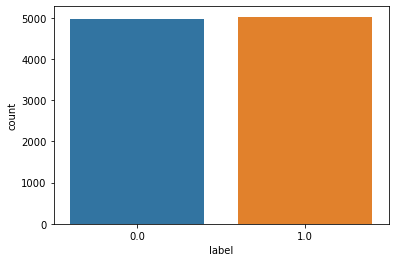

In [6]:
print('label 0:', round(
        y['label'].value_counts()[0]/len(dfPoints)*100, 2), '% of datapoints')
print('label 1:', round(
        y['label'].value_counts()[1]/len(dfPoints)*100, 2), '% of datapoints')
sns.countplot("label",data=dfPoints)

<h3> Train and Test split </h3>
Division between training and testing, in the proportion of 30% on the test basis. It avoids overffiting, due to the model training and adjusting the data on different bases.

In [7]:
# Trains - 70%. Test - 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

<h3> Logistic Regression </h3>
We can understand logistic regression as the analog of linear regression for classification problems. This type of problem arises when we want to categorize some variable by classes (usually two classes).
In this step, we adjust the model on the training base.
	
<a href="https://medium.com/@hpsuresh12345/logistic-regression-60694a973bee">
         <img alt="Qries" src="https://miro.medium.com/max/1428/1*Vd9ZTC1zWJPtV7iXPMJk1Q.png"
         width=400" height="200">

In [8]:
#Logistic Regression. penalty l2 regularization, tolerance for stopping criteria = 10^-4, C=1
clf_lr = LogisticRegression(penalty='l2', tol=0.0001, C=1.0)
#fitting the train data
clf_lr.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h3> Metrics </h3>
There are many metrics useful for evaluating classification algorithms. Some of the most important are:
<ol>
<li><b>Accuracy</b>: 
The most used, basically measures the average classifier performance. It is the number of correct predictions made by the model over all types of predictions made</li>
<li><b>Precision</b>: Measures the percentage of hits between observations rated positive</li>
<li><b>Recall</b>: 
Measures the percentage of positive observations that were correctly classified</li>
<li><b>F1</b>: 
This metric is a balance between recall and precision, using the harmonic mean of these metrics: $$F_{1}=\frac{2*precision*recall}{precision+recall}$$</li> 
</ol>

In [29]:
prediction_lr = clf_lr.predict(X_test) #predict the test data
accuracy_lr = metrics.accuracy_score(y_pred=prediction_lr, y_true=y_test) #accuracy score
precision_lr = metrics.precision_score(y_pred=prediction_lr, y_true=y_test) #precision score
recall_lr = metrics.recall_score(y_pred=prediction_lr, y_true=y_test) #recall score
F1_score_lr = metrics.f1_score(y_pred=prediction_lr, y_true=y_test) #F1 score
print('The accuracy score is: %.2f' % accuracy_lr)
print('The precision score is: %.2f' % precision_lr)
print('The recall score is: %.2f' % recall_lr)
print('The F1 score is: %.2f' % F1_score_lr)

The accuracy score is: 0.57
The precision score is: 0.56
The recall score is: 0.68
The F1 score is: 0.61


<h3> Result - Logistic Regression Classifier </h3>
If we simply classify the instances randomly, 50% accuracy would be expected. Analyzing the result above, we can see that the performance of the logistic regression model is poor, indicating underfitting. How accuracy is close to a random classifier, which does not justify the implementation of the algorithm.

<h3> Random Forest Classifier </h3> 
In a simplified way, the random forest algorithm creates several decision trees and combines them to obtain a more accurate and more stable prediction. The Random Forest algorithm has several hyperparameters that need to be configured to optimize performance. We will use the RandomizedSearchCV method to find the best hyperparameters in the model.
<a href="https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57">
         <img alt="Qries" src='https://miro.medium.com/max/1170/1*58f1CZ8M4il0OZYg2oRN4w.png'
         width=500" height="300">

In [18]:

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Adjusting the Random Forest algorithm with optimized hyperparameters in the training base:

In [19]:
RF = RandomForestClassifier()
clf_RF = RandomizedSearchCV(RF, random_grid, random_state=42).fit(X_train,y_train)
prediction_RF = clf_RF.predict(X_test)


In [30]:
prediction_RF = clf_RF.predict(X_test)
accuracy_RF = metrics.accuracy_score(y_pred=prediction_RF, y_true=y_test)
precision_RF = metrics.precision_score(y_pred=prediction_RF, y_true=y_test)
recall_RF = metrics.recall_score(y_pred=prediction_RF, y_true=y_test)
F1_score_RF = metrics.f1_score(y_pred=prediction_RF, y_true=y_test)
print('The accuracy score is: %.2f' % accuracy_RF)
print('The precision score is: %.2f' % precision_RF)
print('The recall score is: %.2f' % recall_RF)
print('The F1 score is: %.2f' % F1_score_RF)

The accuracy score is: 0.80
The precision score is: 0.80
The recall score is: 0.80
The F1 score is: 0.80


<h3> Result - Random Forest </h3>
As a result, we can see a significant improvement in the performance of the Random Forest algorithm in all the metrics used in comparison with the Logistic Regression algorithm. <b>The random forest model was able to correctly classify 80% of the test base instances, that is, it is able to correctly predict 80% of the class of instances.